In [2]:
import pandas as pd
import numpy as np

import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
har_data = pd.read_parquet('data/train_data.parquet')

har_data["activity"] = (
                        har_data["activity"]
                        .astype("category")
                        .cat
                        .rename_categories({"WALKING": "Walking",
                                            "LAYING": "Laying", 
                                            "WALKING_UPSTAIRS": "Upstairs", 
                                            "WALKING_DOWNSTAIRS": "Downstairs", 
                                            "SITTING": "Sitting", 
                                            "STANDING": "Standing"})
)
my_har_data = pd.DataFrame()
body_acc_x = pd.read_csv('data/train/body_acc_x_train.txt', sep='\s+', header=None)
body_acc_y = pd.read_csv('data/train/body_acc_y_train.txt', sep='\s+', header=None)
body_acc_z = pd.read_csv('data/train/body_acc_z_train.txt', sep='\s+', header=None)

body_gyro_x = pd.read_csv('data/train/body_gyro_x_train.txt', sep='\s+', header=None)
body_gyro_y = pd.read_csv('data/train/body_gyro_y_train.txt', sep='\s+', header=None)
body_gyro_z = pd.read_csv('data/train/body_gyro_z_train.txt', sep='\s+', header=None)

y_train = pd.read_csv('data/train/y_train.txt', sep='\s+', header=None)

y_train_labels = pd.read_csv('data/activity_labels.txt', delim_whitespace=True, header=None)
y_train_labels = y_train_labels[1].tolist()
y_train[0] = y_train[0].map(lambda x: y_train_labels[x-1])

y_train[0] = (
                y_train[0]
                .astype("category")
                .cat
                .rename_categories({"WALKING": "Walking",
                                    "LAYING": "Laying",
                                    "WALKING_UPSTAIRS": "Upstairs",
                                    "WALKING_DOWNSTAIRS": "Downstairs",
                                    "SITTING": "Sitting",
                                    "STANDING": "Standing"})
)


body_acc_x["activity"] = y_train
body_acc_y["activity"] = y_train
body_acc_z["activity"] = y_train

body_gyro_x["activity"] = y_train
body_gyro_y["activity"] = y_train
body_gyro_z["activity"] = y_train

In [4]:
body_gyro_y["activity"].value_counts()

Laying        1407
Standing      1374
Sitting       1286
Walking       1226
Upstairs      1073
Downstairs     986
Name: activity, dtype: int64

In [5]:
har_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Standing


In [6]:
body_acc_x.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,activity
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,Standing
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,Standing
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,Standing
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,Standing
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328,Standing


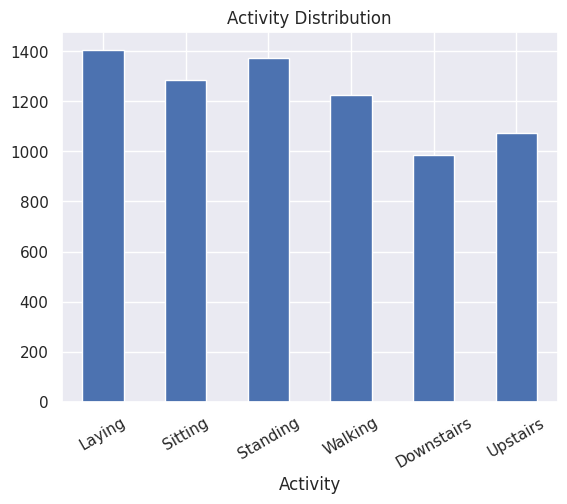

In [7]:
(
    har_data
    .groupby('activity')
    [["activity"]]
    .count()
    .plot(kind="bar", 
          rot=30, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution")
)
plt.show()

Looking at the above graph we see that there's an equal distribution of the target variable in the training set. Except for the 'DOWNSTARIS' and 'UPSTAIRS' classes these are a bit less than the rest.

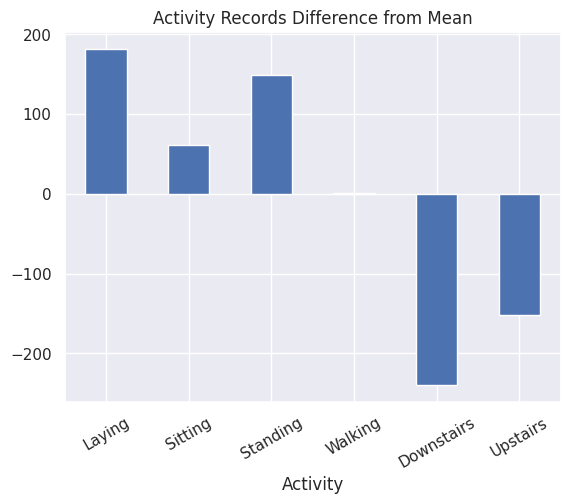

In [8]:
(
    har_data
    .groupby(["activity"])
    [["activity"]]
    .count()
    .apply(lambda x: x - np.mean(x))
    .plot(kind="bar", 
          rot=30, 
          stacked=True, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Records Difference from Mean")
)
plt.show()

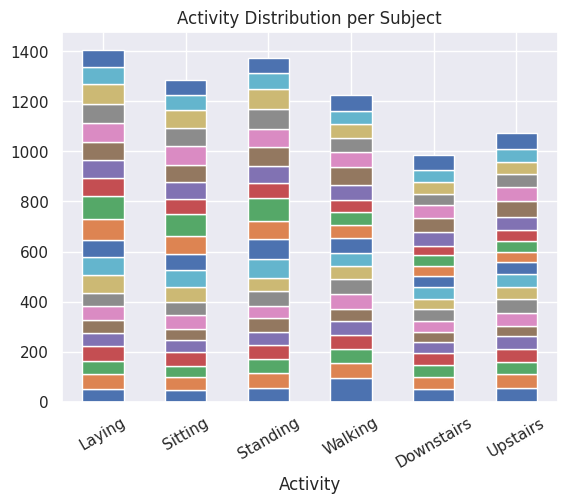

In [9]:
(
    har_data
    .groupby(["activity", "subject"])
    [["activity"]]
    .count()
    .unstack()
    .plot(kind="bar", 
          rot=30, 
          stacked=True, 
          legend=False, 
          xlabel="Activity", 
          title="Activity Distribution per Subject")
)
plt.show()

Now, we looked at the distribution of the activites across the subjects. Here, we wanted to see if a certain activity was dominated by a certain subject. We see that the distribution is pretty even across the subjects. This is good because we don't want our activity to be dominated by a certain subject. This way we can generalize our model better.

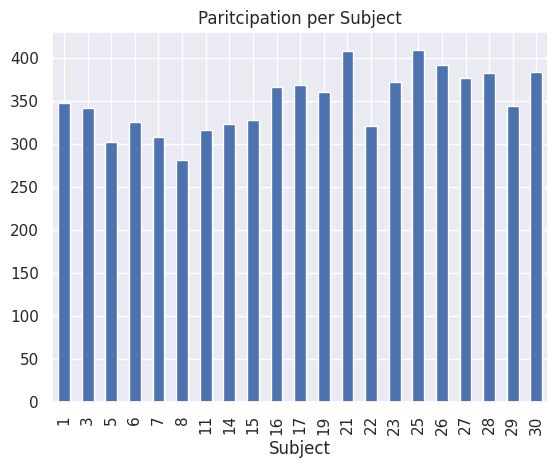

In [10]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .plot(kind="bar", 
          stacked=True, 
          legend=False, 
          xlabel="Subject", 
          title="Paritcipation per Subject")
)
plt.show()

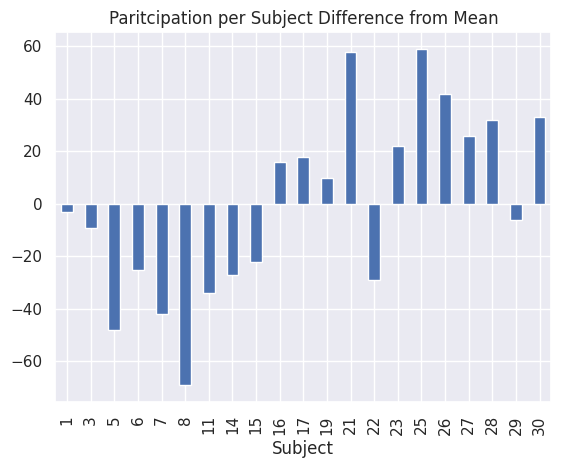

In [11]:
(
    har_data
    .groupby(["subject"])
    [["subject"]]
    .count()
    .apply(lambda x: x - np.mean(x))
    .plot(kind="bar",
          stacked=True,
          legend=False,
          xlabel="Subject",
          title="Paritcipation per Subject Difference from Mean")
)
plt.show()

The above two graphs gives us an insight about the number of readings from each subject. We see that the number of readings from each subject is not really even. However, we think that it's kinda acceptable as the difference is not that big.

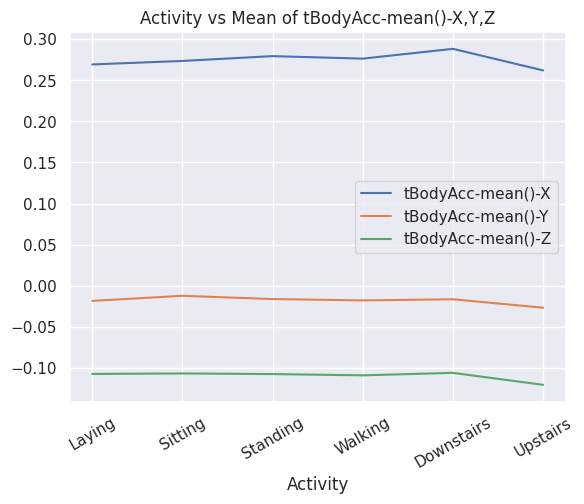

In [12]:
(
    har_data
    .groupby('activity')
    [["activity", 
      "tBodyAcc-mean()-X",
      "tBodyAcc-mean()-Y",
      "tBodyAcc-mean()-Z",]]
    .mean(numeric_only=True)
    .plot(rot=30, 
          xlabel="Activity", 
          title="Activity vs Mean of tBodyAcc-mean()-X,Y,Z")
)
plt.show()

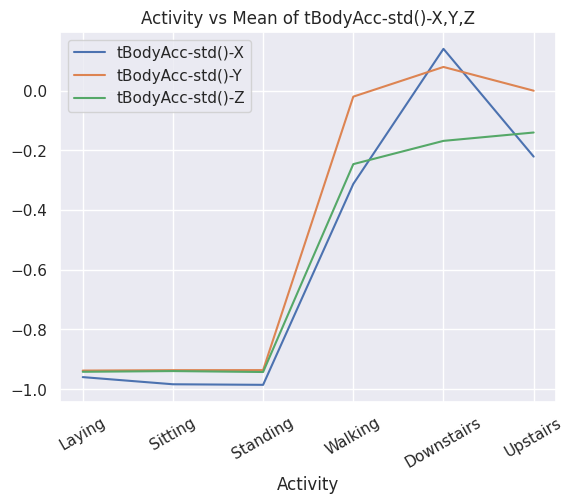

In [13]:
(
    har_data
    .groupby('activity')
    [["activity", 
      "tBodyAcc-std()-X",
      "tBodyAcc-std()-Y",
      "tBodyAcc-std()-Z",]]
    .mean(numeric_only=True)
    .plot(rot=30, 
          xlabel="Activity", 
          title="Activity vs Mean of tBodyAcc-std()-X,Y,Z")
)
plt.show()

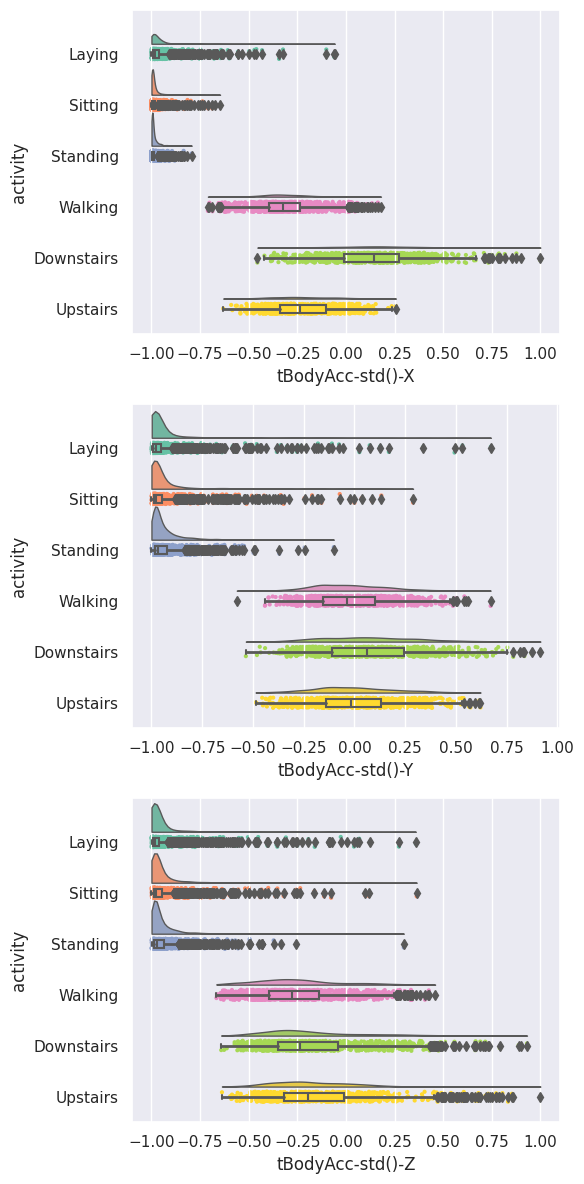

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
# plot the three rainclouds
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyAcc-std()-X",
    orient="h",
    width_viol=1.3,
    ax=ax[0],
)
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyAcc-std()-Y",
    orient="h",
    width_viol=1.3,
    ax=ax[1],
)
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyAcc-std()-Z",
    orient="h",
    width_viol=1.3,
    ax=ax[2],
)

plt.tight_layout()
plt.show()

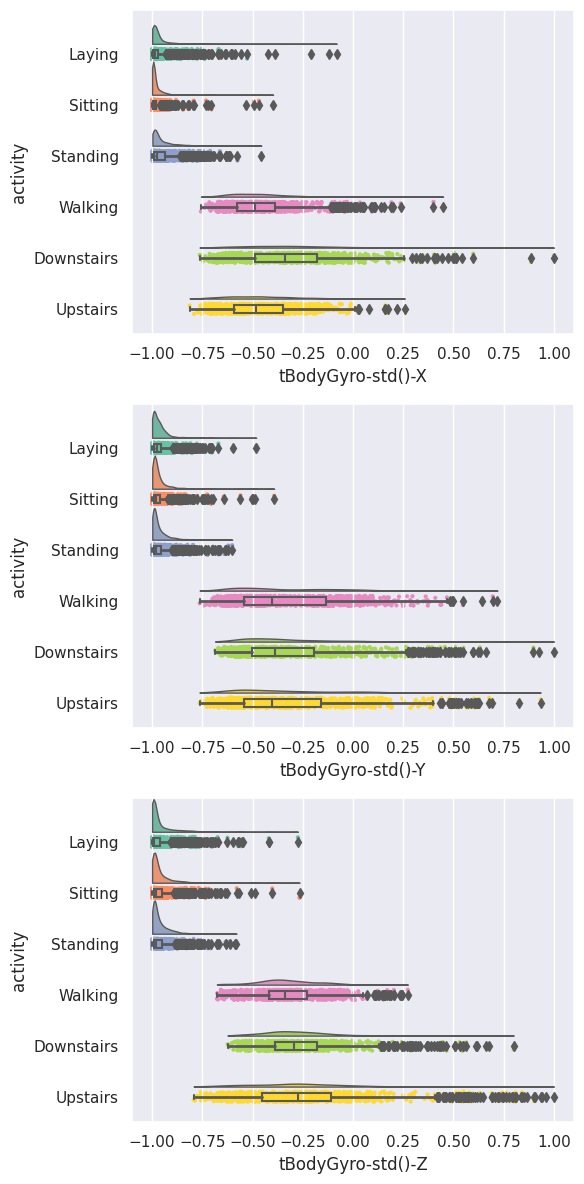

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
# plot the three rainclouds
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyGyro-std()-X",
    orient="h",
    width_viol=1.3,
    ax=ax[0],
)
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyGyro-std()-Y",
    orient="h",
    width_viol=1.3,
    ax=ax[1],
)
pt.RainCloud(
    data=har_data,
    x="activity",
    y="tBodyGyro-std()-Z",
    orient="h",
    width_viol=1.3,
    ax=ax[2],
)

plt.tight_layout()
plt.show()

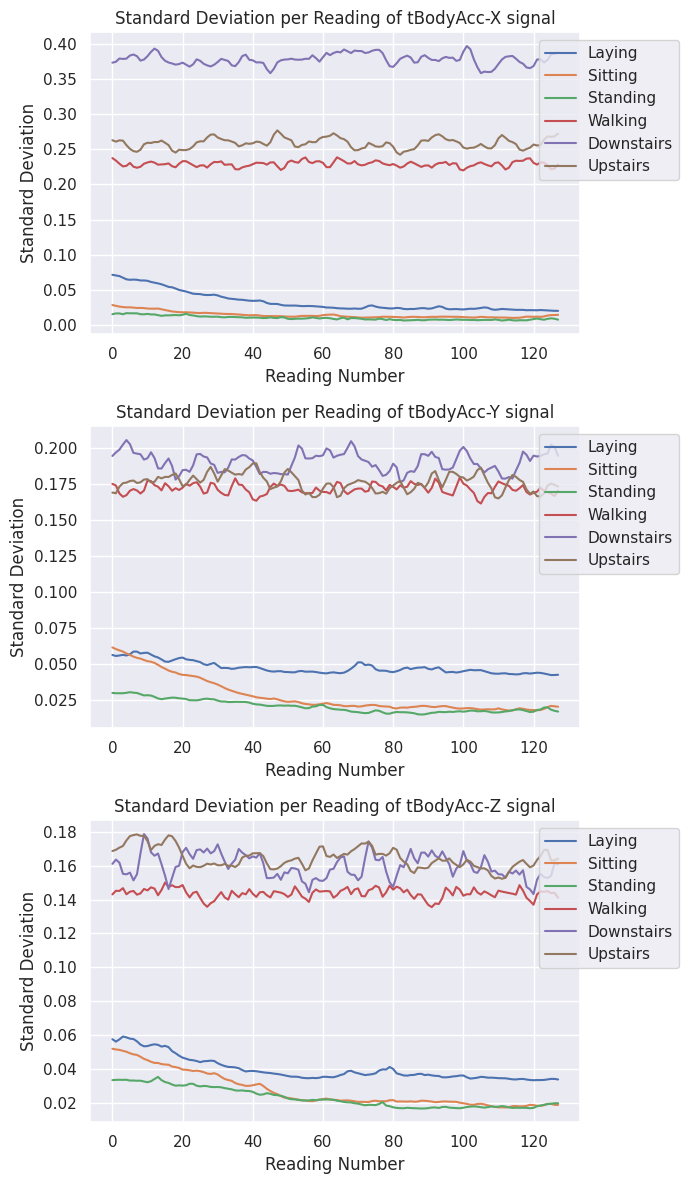

In [66]:
fig, ax = plt.subplots(3, 1, figsize=(7, 12))

(
    body_acc_x
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
        ylabel="Standard Deviation",
        ax=ax[0],
        title="Standard Deviation per Reading of tBodyAcc-X signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_acc_y
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
        ylabel="Standard Deviation",
        ax=ax[1],
        title="Standard Deviation per Reading of tBodyAcc-Y signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_acc_z
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
        ylabel="Standard Deviation",
        ax=ax[2],
        title="Standard Deviation per Reading of tBodyAcc-Z signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
plt.tight_layout()
plt.show()

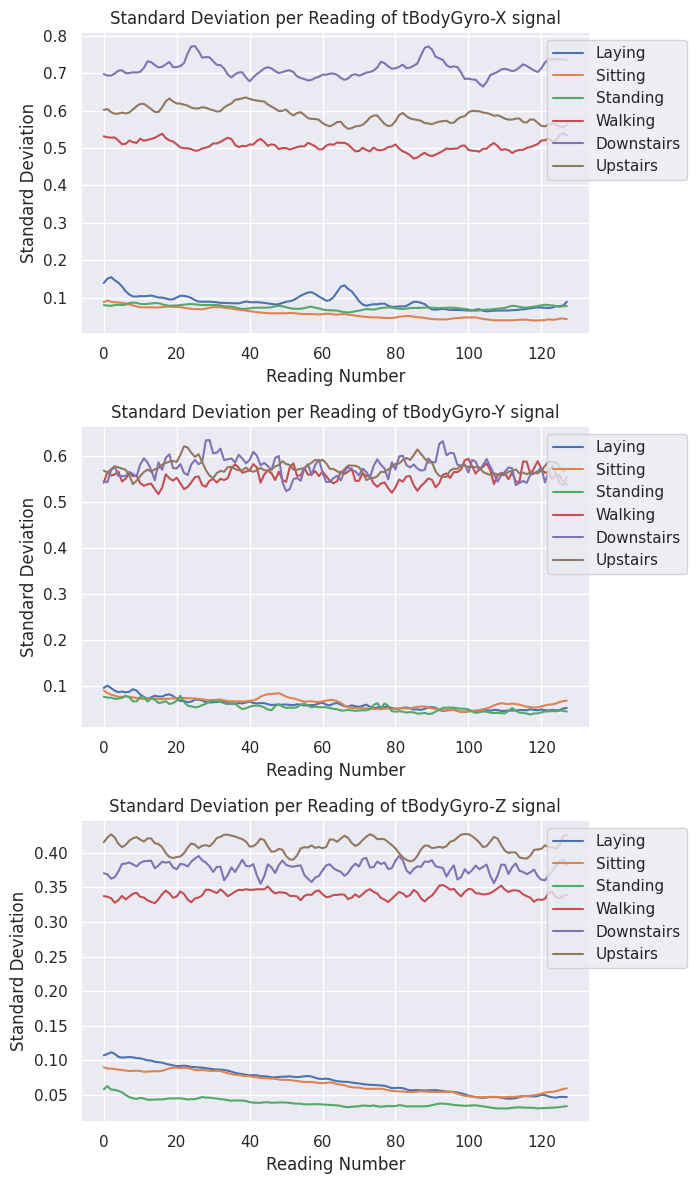

In [68]:
fig, ax = plt.subplots(3, 1, figsize=(7, 12))
(
    body_gyro_x
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
        ylabel="Standard Deviation",
        ax=ax[0],
        title="Standard Deviation per Reading of tBodyGyro-X signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_gyro_y
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
        ylabel="Standard Deviation",
        ax=ax[1],
        title="Standard Deviation per Reading of tBodyGyro-Y signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_gyro_z
    .groupby('activity')
    .std(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(legend=False,
            xlabel="Reading Number",
            ylabel="Standard Deviation",
            ax=ax[2],
            title="Standard Deviation per Reading of tBodyGyro-Z signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
plt.tight_layout()
plt.show()

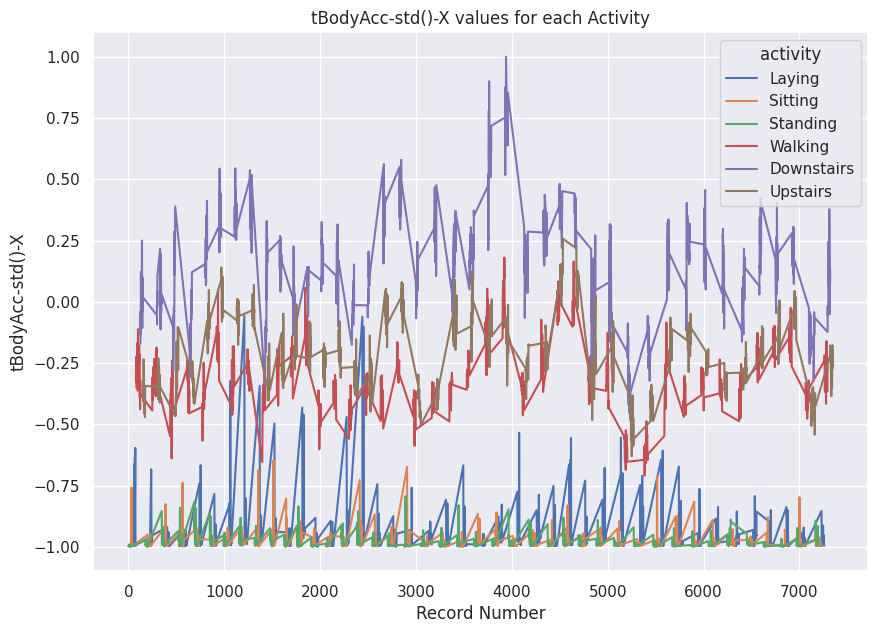

In [26]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-X values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-X",
             hue="activity")


plt.show()

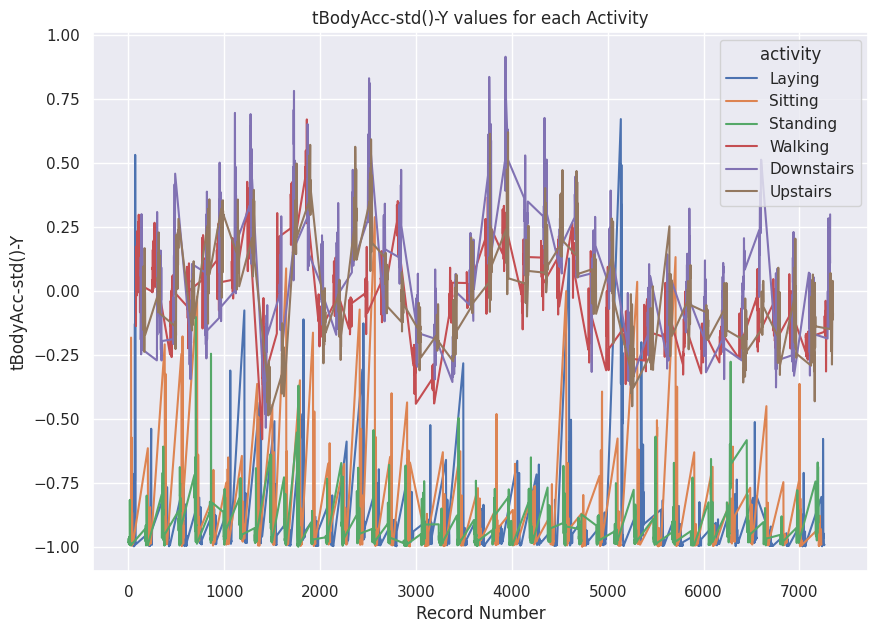

In [27]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-Y values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-Y",
             hue="activity")


plt.show()

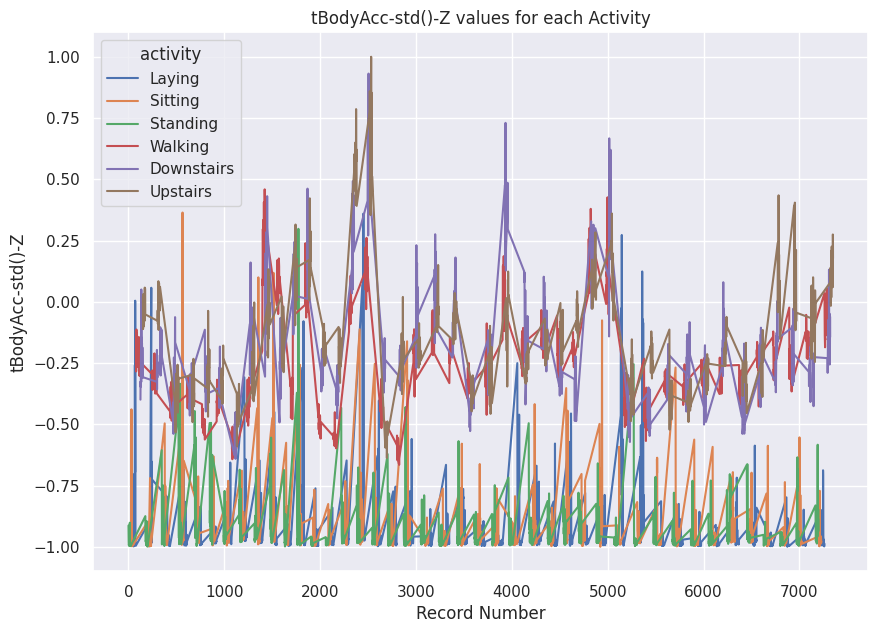

In [28]:
plt.figure(figsize=(10, 7))
plt.title("tBodyAcc-std()-Z values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyAcc-std()-Z",
             hue="activity")


plt.show()

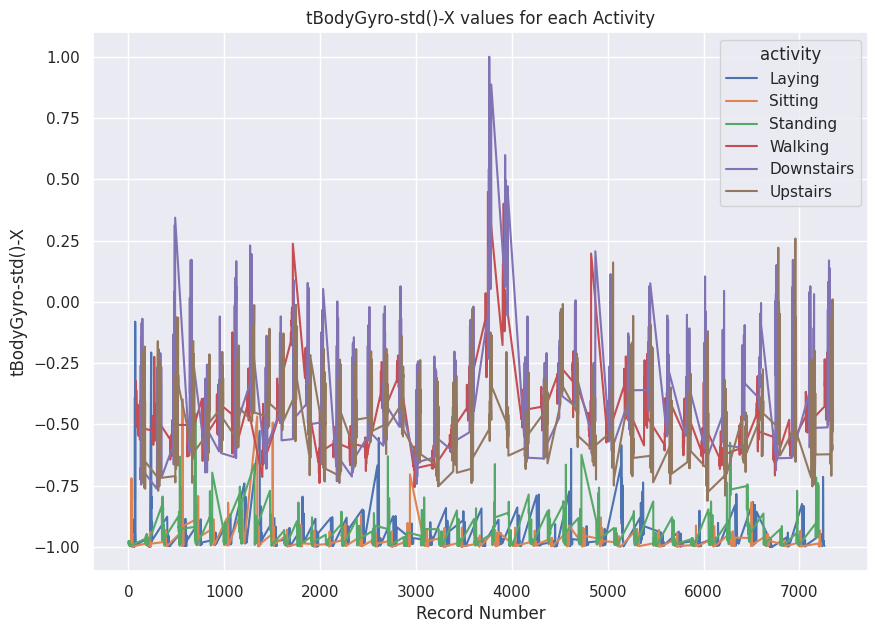

In [29]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-X values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-X",
             hue="activity")


plt.show()

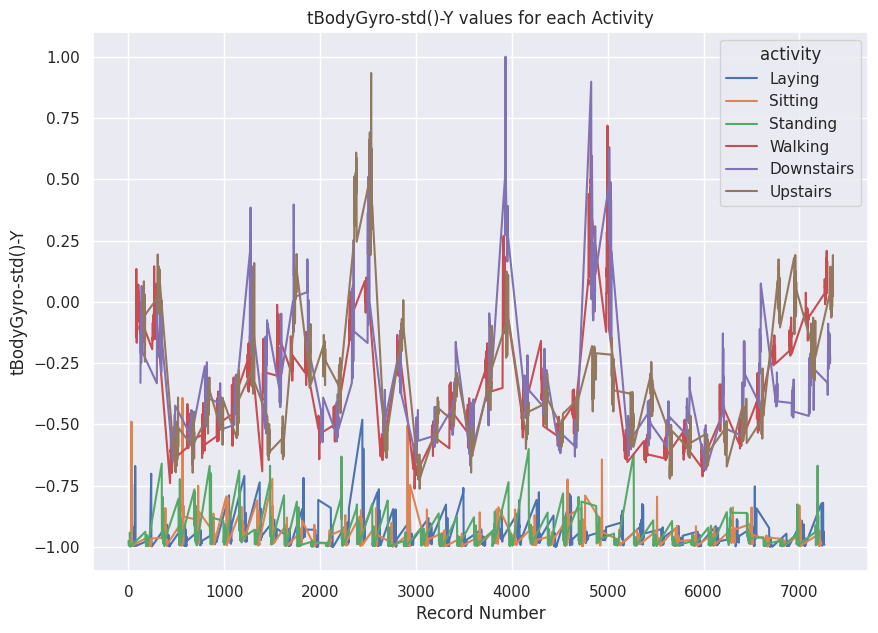

In [30]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-Y values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-Y",
             hue="activity")


plt.show()

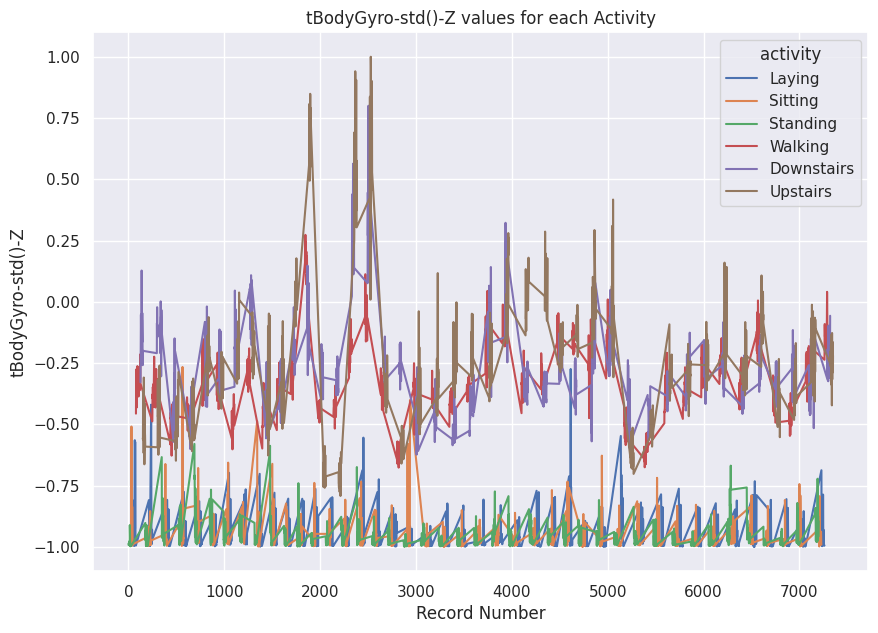

In [31]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-std()-Z values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-std()-Z",
             hue="activity")


plt.show()

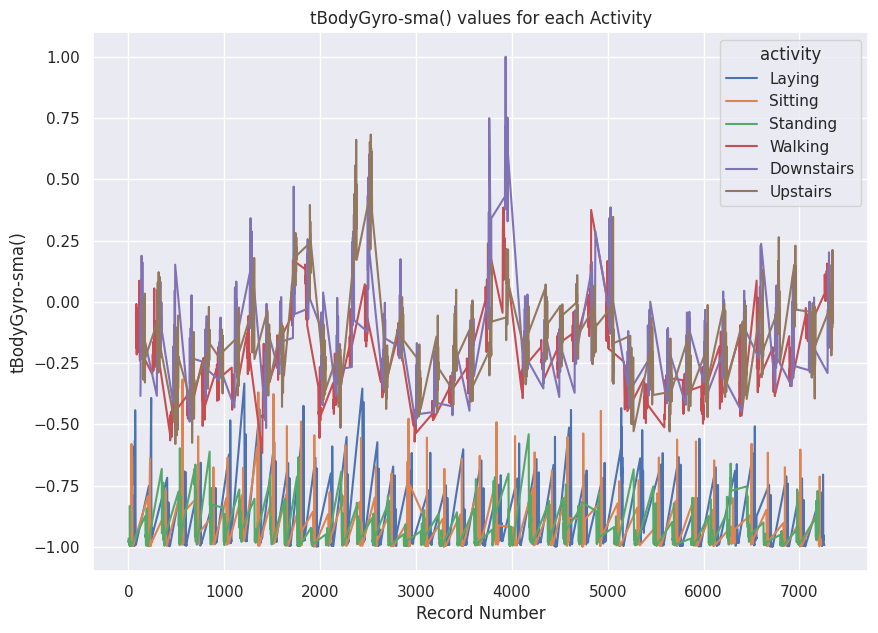

In [32]:
plt.figure(figsize=(10, 7))
plt.title("tBodyGyro-sma() values for each Activity", fontsize=12)
plt.xlabel("Record Number")

sns.lineplot(data=har_data, 
             x=har_data.index, 
             y="tBodyGyro-sma()",
             hue="activity")
plt.show()

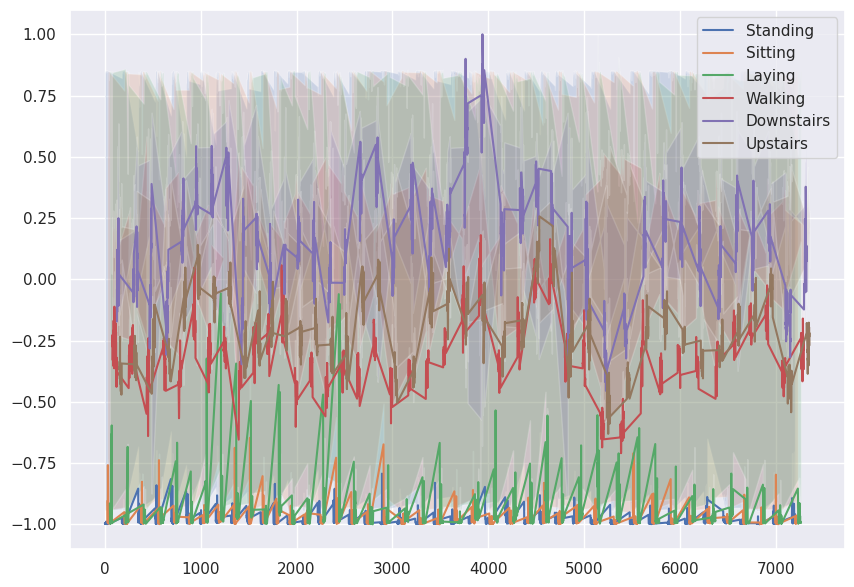

In [33]:
for activity in har_data["activity"].unique():
    (
        har_data[har_data["activity"] == activity]["tBodyAcc-std()-X"]
        .plot(label=activity,
              figsize=(10, 7))
        .fill_between(x=har_data[har_data["activity"] == activity].index, 
                      y1=har_data[har_data["activity"] == activity]["tBodyAcc-min()-X"], 
                      y2=har_data[har_data["activity"] == activity]["tBodyAcc-max()-X"], 
                      alpha=0.2)
    )

plt.legend()
plt.show()

In [34]:
(
    body_gyro_z
    .groupby('activity')
    .agg(['min', 'max', 'std'], numeric_only=True)
    .transpose()
    .unstack()
)

activity    Laying                       Sitting                      \
               min       max       std       min       max       std   
0        -0.670295  0.799795  0.106954 -0.507726  0.606790  0.089694   
1        -0.585100  0.881675  0.109017 -0.503307  0.481026  0.088011   
2        -0.465700  0.946973  0.111529 -0.531912  0.482221  0.087905   
3        -0.469933  0.817699  0.109207 -0.542438  0.377916  0.087228   
4        -0.470358  0.594251  0.104946 -0.526001  0.411676  0.086551   
..             ...       ...       ...       ...       ...       ...   
123      -0.501555  0.333352  0.046240 -1.020795  0.552103  0.054269   
124      -0.480576  0.375095  0.045852 -1.055446  0.590943  0.055144   
125      -0.486198  0.447170  0.046977 -1.031309  0.637963  0.056531   
126      -0.489518  0.390168  0.046943 -1.035528  0.623411  0.058525   
127      -0.503370  0.389176  0.046625 -1.069563  0.628543  0.059177   

activity  Standing                       Walking                      \
               min       max       std       min       max       std   
0        -1.077288  0.235221  0.058009 -1.308632  1.179825  0.337408   
1        -1.329607  0.252968  0.062483 -1.423102  1.205054  0.336485   
2        -1.062866  0.290726  0.057533 -1.369368  1.434532  0.334449   
3        -1.241965  0.298941  0.057085 -1.286720  1.342110  0.327848   
4        -1.098532  0.257320  0.055776 -1.307685  1.075259  0.331576   
..             ...       ...       ...       ...       ...       ...   
123      -0.215038  0.276807  0.031335 -1.276177  1.217776  0.343507   
124      -0.298239  0.248250  0.031598 -1.460163  1.257305  0.336130   
125      -0.282451  0.310450  0.032264 -1.589741  1.414230  0.334110   
126      -0.278247  0.360021  0.032890 -1.313873  1.441197  0.337537   
127      -0.301784  0.404205  0.033552 -1.176636  1.220344  0.339098   

activity Downstairs                      Upstairs                      
                min       max       std       min       max       std  
0         -1.476881  1.356020  0.370518 -2.216418  1.671485  0.415231  
1         -1.528926  1.557924  0.368962 -2.167794  1.819116  0.422282  
2         -1.272198  1.113072  0.362644 -2.036561  1.967763  0.426711  
3         -1.532294  1.563743  0.364934 -1.885443  1.807103  0.422376  
4         -1.729513  1.800632  0.372947 -1.856467  1.418927  0.413155  
..              ...       ...       ...       ...       ...       ...  
123       -1.844006  1.348720  0.373171 -1.766066  1.581341  0.408100  
124       -1.571839  1.747755  0.382095 -1.826266  1.614938  0.406336  
125       -1.811177  1.153280  0.387732 -1.854686  1.470271  0.410997  
126       -1.625237  1.607418  0.389838 -2.036767  1.341806  0.423919  
127       -1.660406  1.898607  0.381888 -2.192251  1.440078  0.425380  

[128 rows x 18 columns]

In [35]:
my_har_data["tBodyAcc-std()-X"] = (
    body_acc_x
    .drop("activity", axis=1)
    .aggregate('std', axis=1)
)

my_har_data["tBodyAcc-std()-Y"] = (
    body_acc_y
    .drop("activity", axis=1)
    .aggregate('std', axis=1)
)

my_har_data["tBodyAcc-std()-Z"] = (
    body_acc_z
    .drop("activity", axis=1)
    .aggregate('std', axis=1)
)

In [36]:
my_har_data["tBodyAcc-min()-X"] = (
    body_acc_x
    .drop("activity", axis=1)
    .aggregate('min', axis=1)
)

my_har_data["tBodyAcc-min()-Y"] = (
    body_acc_y
    .drop("activity", axis=1)
    .aggregate('min', axis=1)
)

my_har_data["tBodyAcc-min()-Z"] = (
    body_acc_z
    .drop("activity", axis=1)
    .aggregate('min', axis=1)
)

In [37]:
my_har_data["tBodyAcc-max()-X"] = (
    body_acc_x
    .drop("activity", axis=1)
    .aggregate('max', axis=1)
)

my_har_data["tBodyAcc-max()-Y"] = (
    body_acc_y
    .drop("activity", axis=1)
    .aggregate('max', axis=1)
)

my_har_data["tBodyAcc-max()-Z"] = (
    body_acc_z
    .drop("activity", axis=1)
    .aggregate('max', axis=1)
)

In [38]:
my_har_data["activity"] = y_train

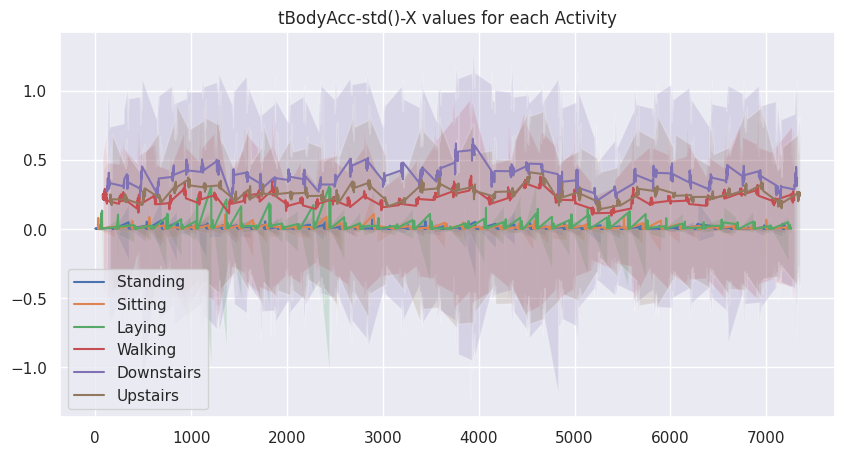

In [39]:
features = ["tBodyAcc-std()-X", "tBodyAcc-std()-Y", "tBodyAcc-std()-Z"]

fig, axs = plt.subplots(figsize=(10, 5))
plt.title("tBodyAcc-std()-X values for each Activity", fontsize=12)

for activity in my_har_data["activity"].unique():
    (
        my_har_data[my_har_data["activity"] == activity]["tBodyAcc-std()-X"]
        .plot(ax=axs,
              label=activity)
        .fill_between(x=my_har_data[my_har_data["activity"] == activity].index, 
                    y1=my_har_data[my_har_data["activity"] == activity]["tBodyAcc-min()-X"], 
                    y2=my_har_data[my_har_data["activity"] == activity]["tBodyAcc-max()-X"], 
                    alpha=0.2,
                    label="_noLabel")
    )

plt.legend()
plt.show()

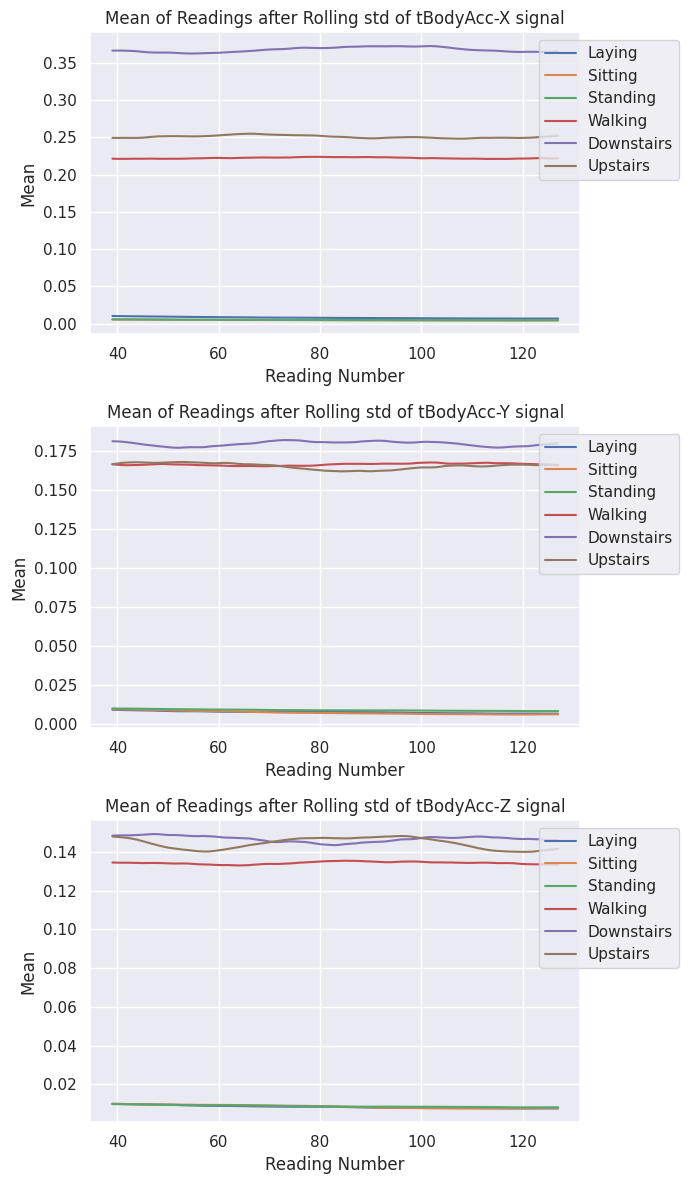

In [72]:
fig, ax = plt.subplots(3,1, figsize=(7, 12))

(
    body_acc_x
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[0],
          title="Mean of Readings after Rolling std of tBodyAcc-X signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_acc_y
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[1],
          title="Mean of Readings after Rolling std of tBodyAcc-Y signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_acc_z
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [["Laying", "Sitting", "Standing"]]
    # [["Walking", "Downstairs", "Upstairs"]]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[2],
          title="Mean of Readings after Rolling std of tBodyAcc-Z signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
plt.tight_layout()
plt.show()

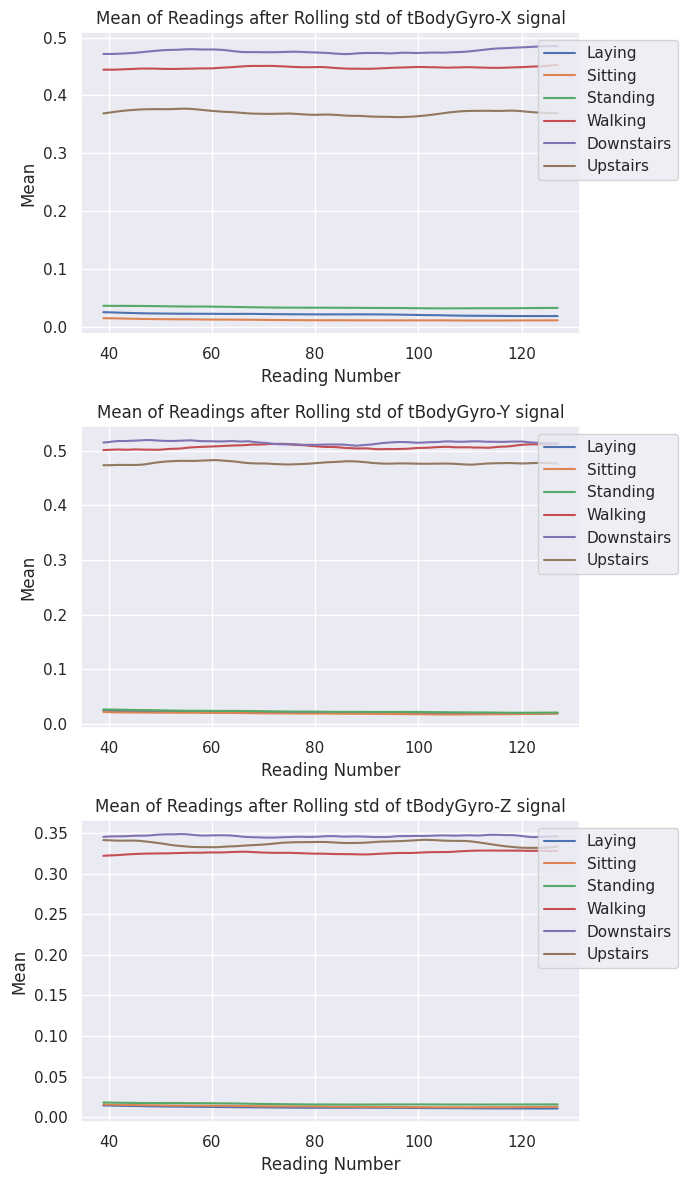

In [71]:
fig, ax = plt.subplots(3, 1, figsize=(7, 12))
(
    body_gyro_x
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [['Walking', 'Upstairs', 'Downstairs']]
    # [['Standing', 'Laying', 'Sitting']]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[0],
          title="Mean of Readings after Rolling std of tBodyGyro-X signal") 
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_gyro_y
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [['Walking', 'Upstairs', 'Downstairs']]
    # [['Standing', 'Laying', 'Sitting']]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[1],
          title="Mean of Readings after Rolling std of tBodyGyro-Y signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)
(
    body_gyro_z
    .rolling(40, axis="columns")
    .std()
    .dropna(axis=1)
    .assign(activity=y_train)
    .groupby('activity')
    .mean(numeric_only=True)
    .transpose()
    # [['Walking', 'Upstairs', 'Downstairs']]
    # [['Standing', 'Laying', 'Sitting']]
    .plot(xlabel="Reading Number",
          ylabel="Mean",
          ax=ax[2],
          title="Mean of Readings after Rolling std of tBodyGyro-Z signal")
    .legend(bbox_to_anchor=(0.9, 1), loc='upper left')
)

plt.tight_layout()
plt.show()